# Reading animal data

Reference: 
- https://www.kaggle.com/uciml/zoo-animal-classification

In [88]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("resources/zoo.csv")

In [35]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [36]:
df.shape

(101, 18)

In [37]:
cols = df.columns.tolist # To display lists

cols

<bound method Index.tolist of Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')>

In [38]:
df = shuffle(df)

In [39]:
# print("Original number of rows : {}".format(df.shape[0]))

df.drop([0,1],inplace=True)


df.shape
# print("After dropping :{}".format(df.shape[0]))

(99, 18)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 99 to 14
Data columns (total 18 columns):
animal_name    99 non-null object
hair           99 non-null int64
feathers       99 non-null int64
eggs           99 non-null int64
milk           99 non-null int64
airborne       99 non-null int64
aquatic        99 non-null int64
predator       99 non-null int64
toothed        99 non-null int64
backbone       99 non-null int64
breathes       99 non-null int64
venomous       99 non-null int64
fins           99 non-null int64
legs           99 non-null int64
tail           99 non-null int64
domestic       99 non-null int64
catsize        99 non-null int64
class_type     99 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.7+ KB


In [41]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.414141,0.202020,0.595960,0.393939,0.242424,0.363636,0.555556,0.595960,0.818182,0.787879,0.080808,0.171717,2.818182,0.747475,0.131313,0.424242,2.868687
std,0.495080,0.403551,0.493203,0.491108,0.430730,0.483494,0.499433,0.493203,0.387657,0.410891,0.273927,0.379054,2.047216,0.436672,0.339461,0.496743,2.107549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.500000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


1    39
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

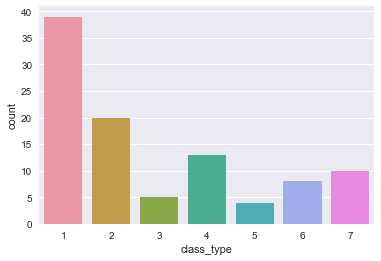

In [45]:
% matplotlib inline

sns.countplot(df['class_type'])
pd.Series.value_counts(df['class_type'])

# Using k nearest neighbour 

In [69]:
from sklearn import neighbors

feature_cols = ['hair', 'feathers', 'eggs', 'milk','airborne',
          'aquatic','predator','toothed','backbone','breathes',
         'venomous', 'fins', 'legs','tail','domestic','catsize']
label_col = ['class_type']

sco = []
scobru = []
sco_ = 0 
kbest=0

for j in range(1,10):
    
    neigh = sk.neighbors.KNeighborsClassifier(n_neighbors=j)
    
    for i in range(10):
        
        df_nn = sk.utils.shuffle(df)
        df_nn = df_nn.reset_index()
        df_nn = df_nn.drop('index', axis=1)
        
        # Split data into training and testing
        X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
            df_nn[feature_cols], df_nn[label_col], test_size=0.3, random_state=43
        )
        
        #knn 
        neigh.fit(X_train, y_train)
        predict = neigh.predict(X_test)
        
        sco.append(neigh.score(X_test, y_test))
        
    if (np.mean(sco) > sco_ ):
        bestk = j
        sco_ = np.mean(sco)
    sco.clear

print('best k: {}'.format(bestk))
neigh = sk.neighbors.KNeighborsClassifier(n_neighbors=kbest)

sco = [] 
    

/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


best k: 1


As the number of legs for an animal is not discrete, it's best to encode this data 

In [75]:
df_legs = pd.get_dummies(df['legs'], sparse=True)

colsLegs = ['leg0','leg1','leg2','leg4','leg6','leg8']

df_legs.columns = colsLegs

df_legs.head()

,leg0,leg1,leg2,leg4,leg6,leg8
99,1,0,0,0,0,0
10,0,0,1,0,0,0
57,0,1,0,0,0,0
9,0,0,1,0,0,0
86,1,0,0,0,0,0


Now we replace the legs column as such: 

In [81]:
updated_df = df.join(df_legs)
updated_df.drop("legs", axis=1)

updated_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,class_type,leg0,leg1,leg2,leg4,leg6,leg8
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,7,1,0,0,0,0,0
10,cheetah,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
57,parakeet,0,1,1,0,1,0,0,0,1,...,1,1,0,2,0,1,0,0,0,0
9,cavy,1,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
86,stingray,0,0,1,0,0,1,1,1,1,...,1,0,1,4,1,0,0,0,0,0


In [91]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(14,12))
    cmap = sns.diverging_palette(220,10, as_cmap=True)
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws = {'shrink': .9},
        ax=ax,
        annot = True,
        annot_kws = {'fontsize': 8}
    )

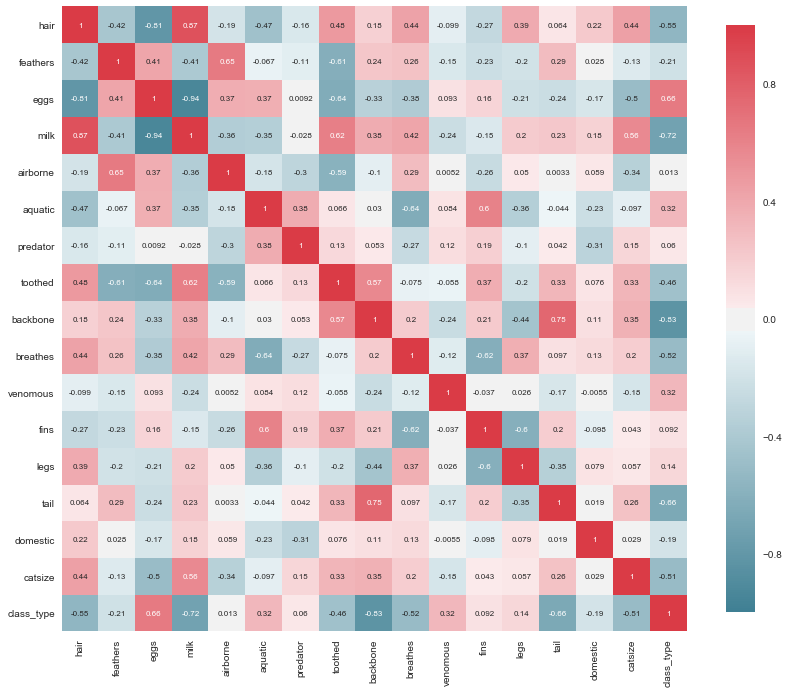

In [92]:
plot_correlation_map(df)